# Support Vector Machines predictions

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import utils as u
from scipy import stats
import copy
# import common_utils.py as cutils


import matplotlib.pylab as plt
plt.style.use('ggplot')

def root_mean_squared_log_error(y_true, y_pred):
    # Alternatively: sklearn.metrics.mean_squared_log_error(y_true, y_pred) ** 0.5
    # assert (y_true >= 0).all() 
    # assert (y_pred >= 0).all()
    log_error = np.log1p(y_pred) - np.log1p(y_true)  # Note: log1p(x) = log(1 + x)
    return np.mean(log_error ** 2) ** 0.5

%run utils.py
%run ../common_utils.py

In [2]:
train, test, metaData = load_all_data()
train = train[(np.abs(stats.zscore(train['price'])) < 5)]

In [3]:
train, test = polar_coordinates(train, test)

In [4]:
###### MISSING VALUES
# area_living
train = u.fillnaReg(train, ['area_total'], 'area_living')

# area_kitchen
train = u.fillnaReg(train, ['area_total', 'area_living'], 'area_kitchen')

# ceiling
train = u.fillnaReg(train, ['stories'], 'ceiling')

In [11]:
############## SETTINGS
test_size = 0.2
random_state_split = 42
features = ['area_total','floor','bathrooms_shared','district','constructed','material','stories', 'r', 'theta', 'building_id']


In [12]:
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)
train_data, test_data = train_test_split(train, test_size=test_size, random_state=random_state_split, stratify=np.log(train.price).round())

C:\Users\Laure\AppData\Local\Temp/ipykernel_18012/1649026346.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace = True)
C:\Users\Laure\AppData\Local\Temp/ipykernel_18012/1649026346.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace = True)


In [13]:
X_train, y_train = train_data[features], train_data['price']
X_test, y_test = test_data[features], test_data['price']

In [14]:
# def runSVR(X_train, y_train, X_test, y_test, 
#     kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.3, epsilon=0.1, shrinking=True, 
#     cache_size=200, verbose=False, max_iter=- 1):
#     model = SVR(
#         kernel=kernel, 
#         degree=degree, 
#         gamma=gamma, 
#         coef0=coef0, 
#         tol=tol, 
#         C=C, 
#         epsilon=epsilon, 
#         shrinking=shrinking, 
#         cache_size=cache_size, 
#         verbose=verbose, 
#         max_iter= max_iter
#     )
#     model.fit(X_train, y_train)
#     rf_prediction = model.predict(X_test)
#     rf_msle = root_mean_squared_log_error(rf_prediction, y_test)
#     return rf_msle

# def optimizeParam(X_train, y_train, X_test, y_test, variable, start, end, step, divider=1):
#     x = []
#     y = []
#     for value in range(start, end, step):
#         if divider != 1: value /= divider
#         x.append(value)
#         y.append(runSVR(X_train, y_train, X_test, y_test, cache_size=value))
#     plt.plot(x, y)
#     plt.xlabel('cache_size parameter values')
#     plt.ylabel('RMLSE')

# def optimizeParamCat(X_train, y_train, X_test, y_test, variable, values):
#     x = []
#     y = []
#     for value in values:
#         x.append(value)
#         y.append(runSVR(X_train, y_train, X_test, y_test, shrinking=value))
#     plt.plot(x, y)
#     plt.xlabel('shrinking parameter values')
#     plt.ylabel('RMLSE')

# optimizeParam(X_train, y_train, X_test, y_test, 'cache_size', 150, 500, 50, divider=1)

In [15]:
model = SVR(
    kernel='linear', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    tol=0.001, 
    C=1.3, 
    epsilon=0.1, 
    shrinking=True, 
    cache_size=200, 
    verbose=False, 
    max_iter=- 1
)

In [16]:
# model.fit(X_train, y_train)
# rf_prediction = model.predict(X_test)
# rf_mse = root_mean_squared_log_error(rf_prediction, y_test)

scores, average, best_model, best_index  = SVR_groupKFold(5, model, train[features], train['price'])
# print('Test RMSLE:', rf_mse)
# plt.scatter(rf_prediction, y_test, alpha=0.2)
# plt.xlabel('Random Forest prediction')
# plt.ylabel('Ground Truth')

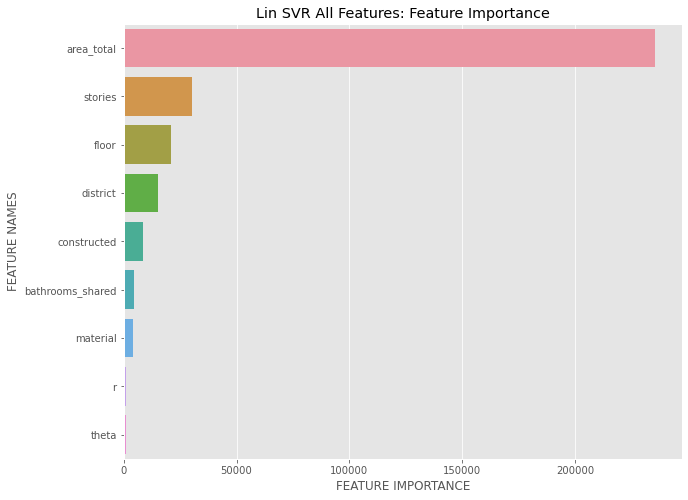

In [ ]:
lin_svr_importance = abs(model.coef_[0])
%run ../hasse-testsite/utils_hasse.py
plot_feature_importance(lin_svr_importance, list(X_train.columns), 'Lin SVR All Features: ')